In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:/users/memdp/PYTHON_CODE/Datasets')

sns.set(rc={'figure.figsize': (15,10)})
running_df = pd.read_csv('Activities.csv')
running_df

# Date is in ISO format YYYY-MM-DD

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Best Lap Time,Number of Laps,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,2021-09-29 13:38:58,False,Oakland Trail Running,3.67,495,00:41:46,158,183,3.3,...,07:06.21,4,0.0,--,--,--,00:41:38,00:48:02,"1,077","1,257"
1,Running,2021-09-18 21:24:52,False,Alameda Running,3.39,402,00:33:34,149,184,3.3,...,03:07.41,4,0.0,--,--,--,00:00:00,00:34:11,9,35
2,Trail Running,2021-09-17 18:40:19,False,Oakland Trail Running,3.21,425,00:34:26,154,178,3.5,...,02:21.95,4,0.0,--,--,--,00:00:00,00:34:26,973,"1,228"
3,Trail Running,2021-09-09 14:35:29,False,Oakland Trail Running,2.47,345,00:26:32,164,188,3.6,...,04:45.68,3,0.0,--,--,--,00:00:00,00:26:32,"1,006","1,220"
4,Running,2021-09-06 19:31:17,False,Contra Costa County Running,3.51,433,00:33:32,160,180,3.6,...,04:57.17,4,0.0,--,--,--,00:00:00,00:34:24,89,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Running,2021-03-26 09:00:11,False,Concord Running,6.16,728,00:53:38,158,179,3.5,...,01:31.56,7,0.0,33,16,38,00:53:30,00:53:50,39,106
76,Running,2021-03-25 16:30:53,False,Concord Running,7.83,915,01:10:58,157,178,3.7,...,07:39.33,8,0.0,33,20,39,01:10:47,01:11:36,61,236
77,Running,2021-03-24 18:20:24,True,Concord Running,8.51,963,01:14:34,154,173,3.6,...,04:46.09,9,0.0,38,22,49,01:14:24,01:15:25,51,171
78,Trail Running,2021-03-24 12:22:31,False,Concord Trail Running,2.01,268,00:20:14,154,182,2.7,...,00:07.48,3,0.0,--,--,--,00:19:49,00:20:48,390,608


(array([17.,  1.,  1.,  3.,  3.,  5., 40.,  4.,  3.,  3.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

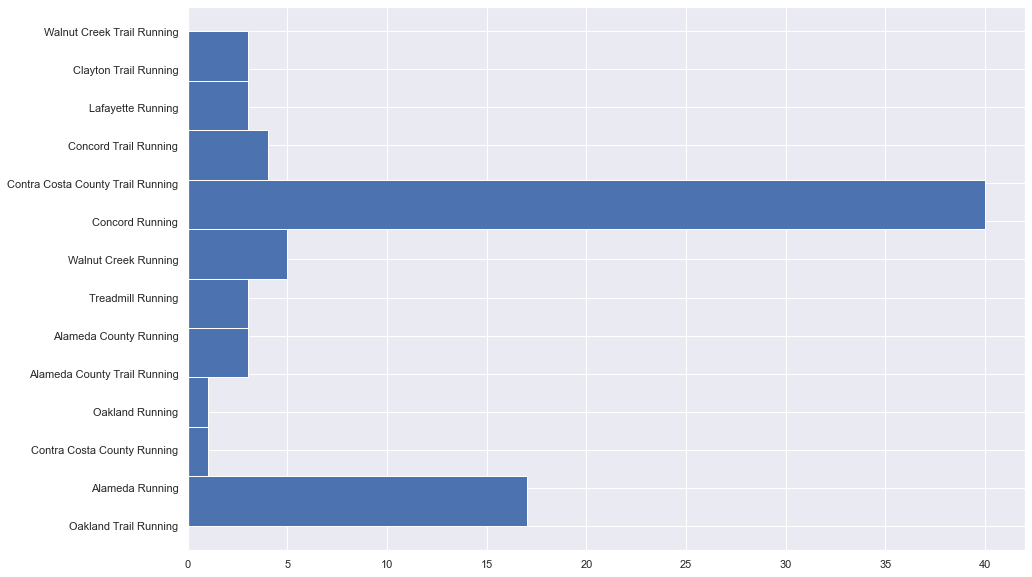

In [2]:
# Horizontal histogram that provides frequency of running
# at each location
plt.hist(running_df.Title, orientation='horizontal')

In [3]:
# Check the column types
running_df.dtypes

Activity Type                object
Date                         object
Favorite                       bool
Title                        object
Distance                    float64
Calories                     object
Time                         object
Avg HR                        int64
Max HR                        int64
Aerobic TE                  float64
Avg Run Cadence               int64
Max Run Cadence               int64
Avg Pace                     object
Best Pace                    object
Total Ascent                 object
Total Descent                object
Avg Stride Length           float64
Avg Vertical Ratio          float64
Avg Vertical Oscillation    float64
Training Stress Score®      float64
Grit                        float64
Flow                        float64
Dive Time                    object
Min Temp                    float64
Surface Interval             object
Decompression                object
Best Lap Time                object
Number of Laps              

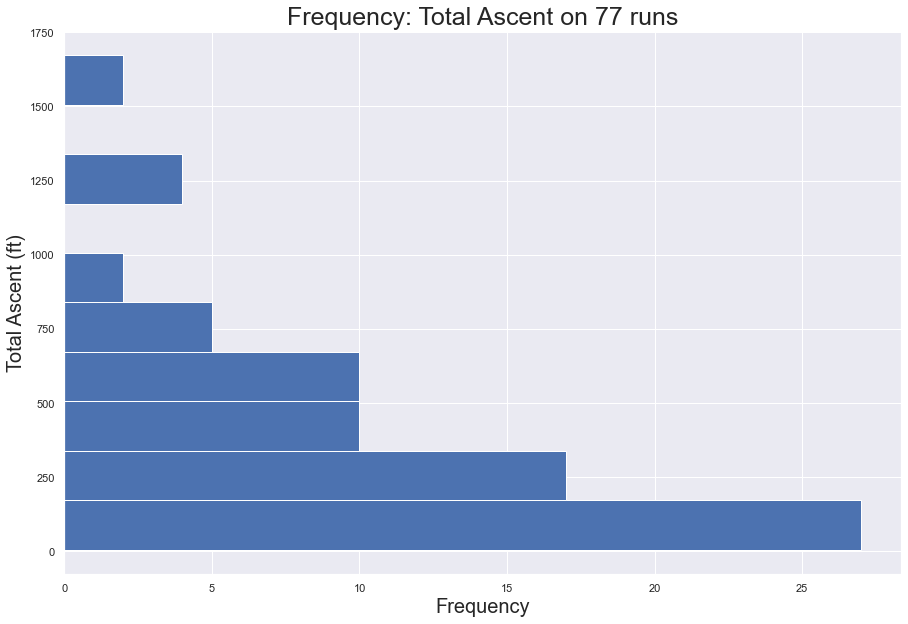

In [4]:
# running_df['Total Ascent'] = running_df['Total Ascent'].astype(dtype='float64')
# running_df['Total Ascent'].astype(int)
# running_df.dtypes
cleaned_df = running_df[running_df['Total Ascent'] != '--']
ascent_col = cleaned_df['Total Ascent'].replace(',', '', regex=True)
ascent_col = ascent_col.astype(int)
ascent_col = ascent_col.sort_values()
avg_HR = running_df['Avg HR']

# Create and save a png plot containing the frequency
# of certain feet of elevation
plt.hist(ascent_col, orientation='horizontal')
plt.title(f'Frequency: Total Ascent on {ascent_col.shape[0]} runs', fontsize=25)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Total Ascent (ft)', fontsize=20)
plt.savefig('c:/users/memdp/PYTHON_CODE/Figures/Freq_Ascent.png')

In [5]:
X = pd.concat([avg_HR, ascent_col], axis=1)
X = X.fillna(0)
# X.isna().sum()
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# creating centroids along with rounding an np array
centroids = np.around(kmeans.cluster_centers_, 2)
print(f'Centroids\n {centroids}')

Centroids
 [[152.23 221.15]
 [155.67 962.83]]


<AxesSubplot:title={'center':'Ascent vs HR'}, xlabel='Avg HR', ylabel='Total Ascent'>

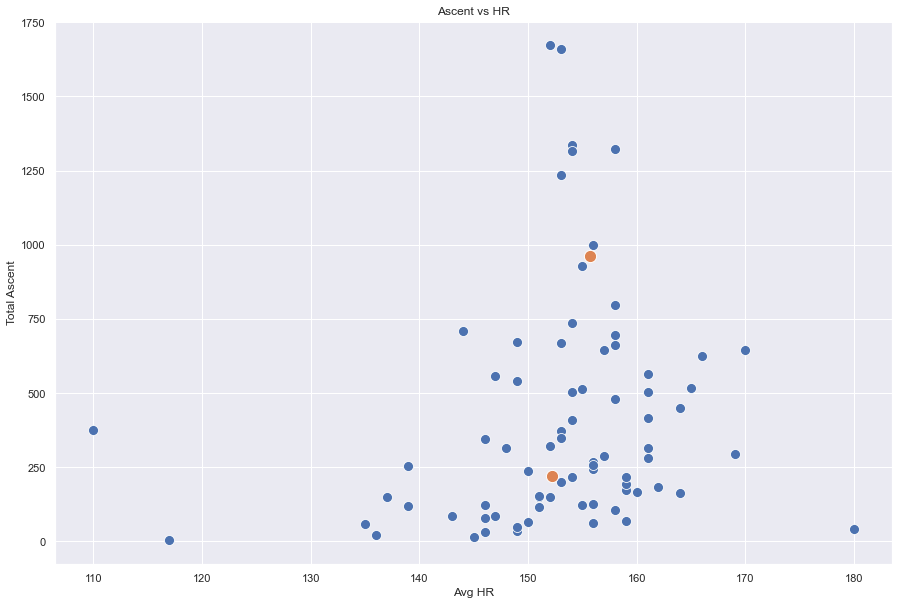

In [6]:

sns.scatterplot(x=avg_HR, y=ascent_col, s=100).set_title('Ascent vs HR')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=150)

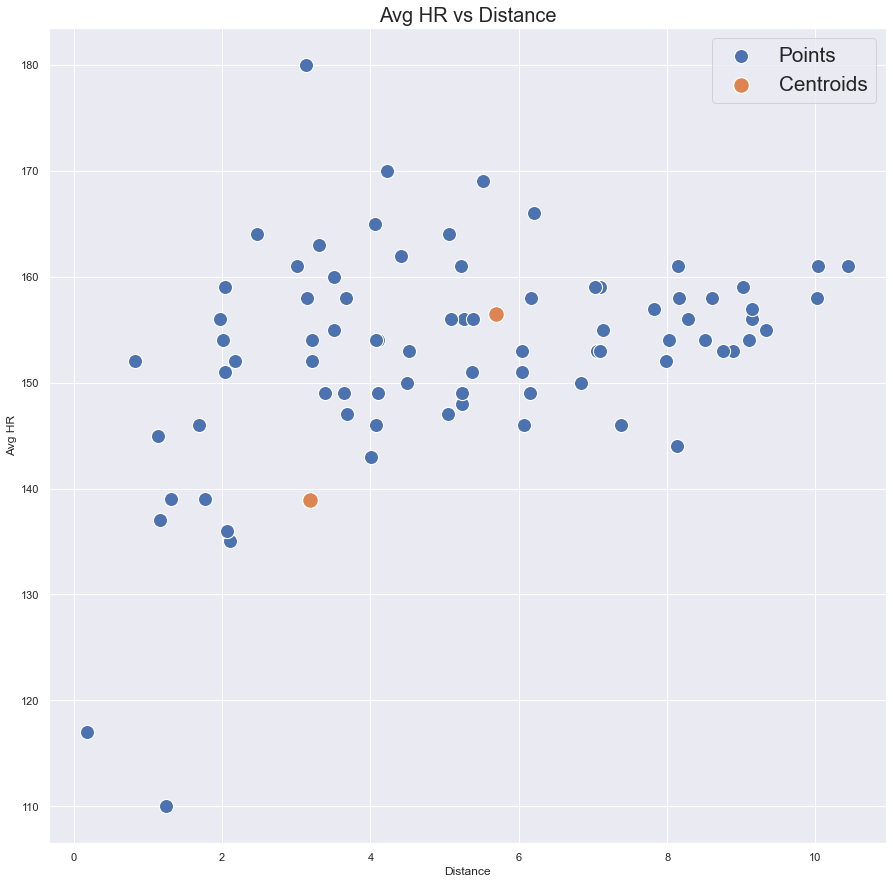

In [7]:
# Using kmeans to find the centers of my 
X=pd.concat([running_df.Distance, running_df['Avg HR']], axis=1)
kmeans_dist = KMeans(n_clusters=2, random_state=0).fit(X)
centroids_dist = np.around(kmeans_dist.cluster_centers_, 2)

labels = ['Points', 'Centroids']
fig, bar = plt.subplots(figsize=(15,15))

# Fix this issue with plots **bar** definition
bar.set_title('Avg HR vs Distance', fontsize=20)
bar = sns.scatterplot(x=running_df.Distance, y=running_df['Avg HR'], s=200)
sns.scatterplot(x=centroids_dist[:,0], y=centroids_dist[:, 1], s=250)
bar.legend(labels, fontsize='xx-large')
# sns.savefig('C:/users/memdp/PYTHON_CODE/Figures/Dist_heartrate.png')
# bar.set_xlabel(fontsize=20)

In [8]:
"""
Note that I do a good job of maintaining a steady and
comfortable heart rate

"""

# Average heart rate at a certain level of elevation
for i in range(2):
    print(f'Heart rate is {centroids[i,0]}bpm at around {centroids[i,1]}ft of elevation')
    

Heart rate is 152.23bpm at around 221.15ft of elevation
Heart rate is 155.67bpm at around 962.83ft of elevation


In [24]:
calories_cleaned = running_df.Calories.replace(',', '', regex=True)

# Convert objects to floats
calories_cleaned = calories_cleaned.astype(float)

In [11]:
# Ideal pounds lost based on calories burned

weight_lost = round(calories_cleaned.sum()/3500, 2)
print(f'Pounds lost: {weight_lost}lbs')

Pounds lost: 14.39lbs


In [12]:
running_df

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Best Lap Time,Number of Laps,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,2021-09-29 13:38:58,False,Oakland Trail Running,3.67,495,00:41:46,158,183,3.3,...,07:06.21,4,0.0,--,--,--,00:41:38,00:48:02,"1,077","1,257"
1,Running,2021-09-18 21:24:52,False,Alameda Running,3.39,402,00:33:34,149,184,3.3,...,03:07.41,4,0.0,--,--,--,00:00:00,00:34:11,9,35
2,Trail Running,2021-09-17 18:40:19,False,Oakland Trail Running,3.21,425,00:34:26,154,178,3.5,...,02:21.95,4,0.0,--,--,--,00:00:00,00:34:26,973,"1,228"
3,Trail Running,2021-09-09 14:35:29,False,Oakland Trail Running,2.47,345,00:26:32,164,188,3.6,...,04:45.68,3,0.0,--,--,--,00:00:00,00:26:32,"1,006","1,220"
4,Running,2021-09-06 19:31:17,False,Contra Costa County Running,3.51,433,00:33:32,160,180,3.6,...,04:57.17,4,0.0,--,--,--,00:00:00,00:34:24,89,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Running,2021-03-26 09:00:11,False,Concord Running,6.16,728,00:53:38,158,179,3.5,...,01:31.56,7,0.0,33,16,38,00:53:30,00:53:50,39,106
76,Running,2021-03-25 16:30:53,False,Concord Running,7.83,915,01:10:58,157,178,3.7,...,07:39.33,8,0.0,33,20,39,01:10:47,01:11:36,61,236
77,Running,2021-03-24 18:20:24,True,Concord Running,8.51,963,01:14:34,154,173,3.6,...,04:46.09,9,0.0,38,22,49,01:14:24,01:15:25,51,171
78,Trail Running,2021-03-24 12:22:31,False,Concord Trail Running,2.01,268,00:20:14,154,182,2.7,...,00:07.48,3,0.0,--,--,--,00:19:49,00:20:48,390,608


In [14]:
# Average Stride Length over all runs
avg_stride = round(running_df['Avg Stride Length'].mean(), 3)
avg_heartrate = running_df['Avg HR'].mean()

print(f'Average stride over {running_df.shape[0]} runs: {avg_stride}')
print(f'Average HR over {running_df.shape[0]} runs: {avg_heartrate}')

Average stride over 80 runs: 0.995
Average HR over 80 runs: 153.0


In [15]:
# Favorite Run(s)
print(f'Favorite run(s): {running_df.Favorite.sum()}')

Favorite run(s): 1


In [16]:
# Total distance mi and km
distance = running_df.Distance
total_distance = round(distance.sum(), 2)
total_distance_km = round(total_distance * 1.60934, 2)

print(f'Total distance: {total_distance} mi or {total_distance_km} km')

Total distance: 414.94 mi or 667.78 km


In [17]:
# Average cadence over all runs
avg_cadence = running_df['Avg Run Cadence']
total_avg_cadence = avg_cadence.mean()
print(f'Average cadence over {running_df.shape[0]}: {total_avg_cadence}')

Average cadence over 80: 168.9


In [18]:
# Average max cadence overl all runs
max_cadence = running_df['Max Run Cadence']
avg_max_cadence = max_cadence.mean()
print(f'Average max cadence over {running_df.shape[0]}: {avg_max_cadence}')

Average max cadence over 80: 204.175


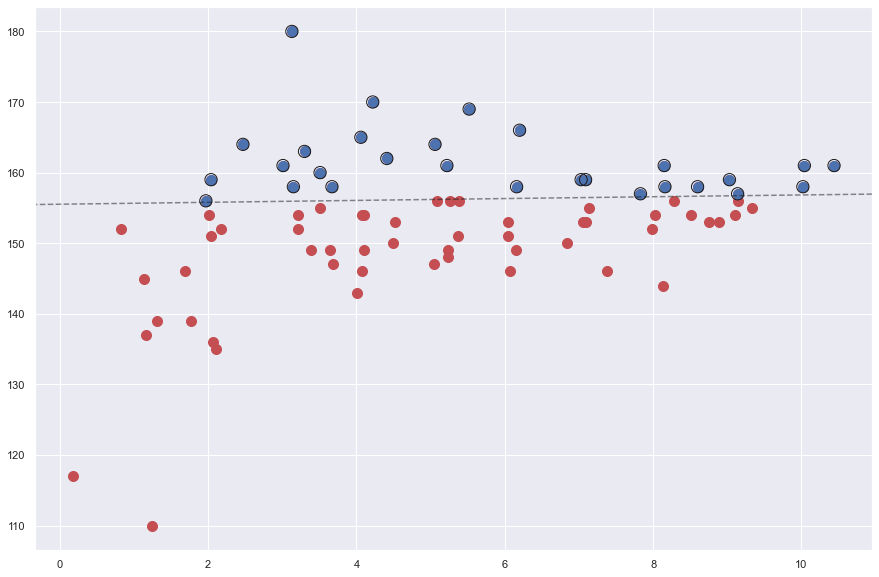

In [20]:
# Classifier for dataframe containing distance
# and average HR
from sklearn import svm

X=pd.concat([running_df.Distance, running_df['Avg HR']], axis=1)

y = []
for x in running_df['Avg HR']:
    if x > 160:
        y.append(1)
    else:
        y.append(0)
labels = pd.DataFrame(y, columns=['Intensity'])

clf = svm.SVC()
clf.fit(X, y)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='r', s=100)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100)
# plot the decision function
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create a grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
           linewidth=1, facecolors='none', edgecolors='k')

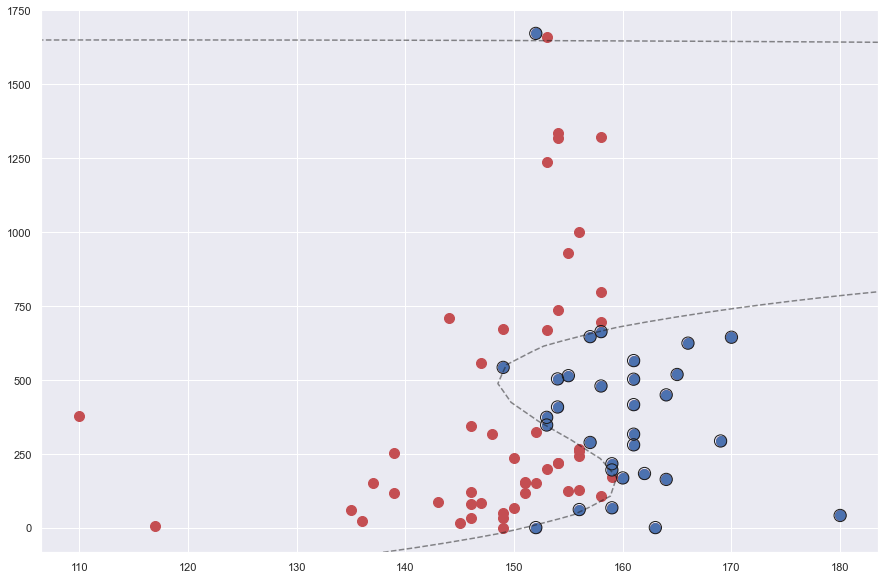

In [21]:
# Classifier for dataframe containing ascent
# and average HR
from sklearn import svm

X = pd.concat([avg_HR, ascent_col], axis=1)
X = X.fillna(0)

clf = svm.SVC()
clf.fit(X, y)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='r', s=100)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100)
# plot the decision function
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create a grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
           linewidth=1, facecolors='none', edgecolors='k')

Text(0.5, 0, 'Calories')

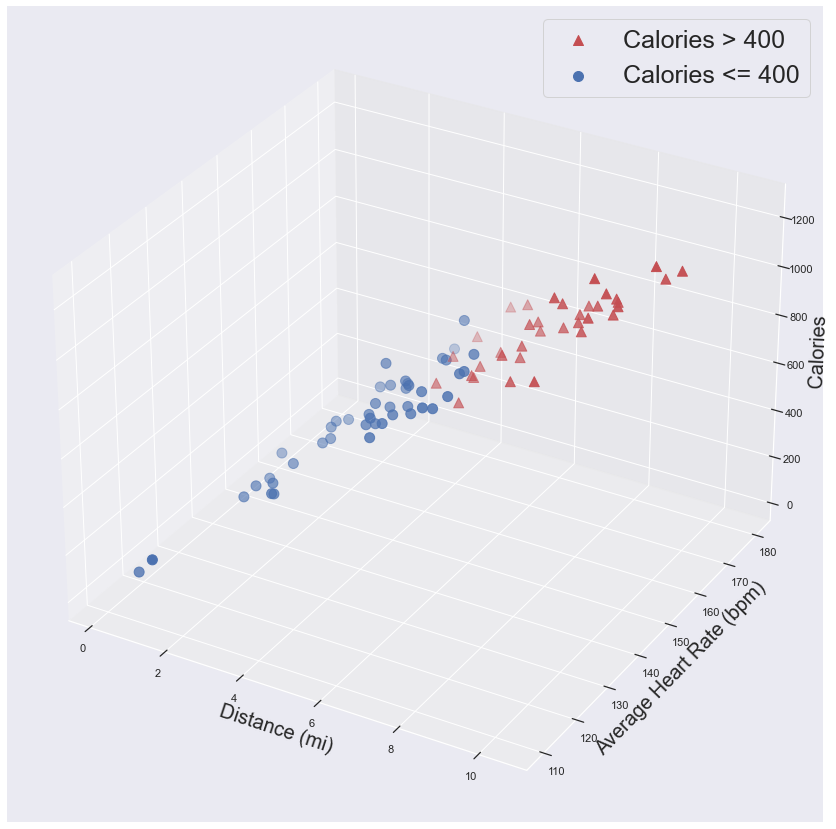

In [22]:
from mpl_toolkits.mplot3d import Axes3D

calories = []
for calorie in calories_cleaned:
    if calorie > 650:
        calories.append(1)
    else:
        calories.append(0)
calories_labels = pd.DataFrame(calories, columns=['High/Low'])

df = pd.concat([running_df.Distance, running_df['Avg HR'], calories_cleaned, calories_labels], axis=1)

High = np.where(df.iloc[:, 3] == 1)
Low = np.where(df.iloc[:, 3] == 0)
df_array = df.to_numpy()

fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(projection='3d')
# ax.scatter(X_all.loc[0:, 'Distance'], X_all.loc[0:, 'Avg HR'], X_all.loc[0:, 'Total Ascent'], marker='o')
ax.scatter(df_array[High, 0], df_array[High, 1], df_array[High, 2], s=100,
           c='r', marker='^', label='Calories > 400')
ax.scatter(df_array[Low, 0], df_array[Low, 1], df_array[Low, 2], s=100, 
           c='b', marker='o', label='Calories <= 400')
ax.legend(fontsize=25)
ax.set_xlabel('Distance (mi)', fontsize=20)
ax.set_ylabel('Average Heart Rate (bpm)', fontsize=20)
ax.set_zlabel('Calories', fontsize=20)


Text(0.5, 0, 'Elevation (ft)')

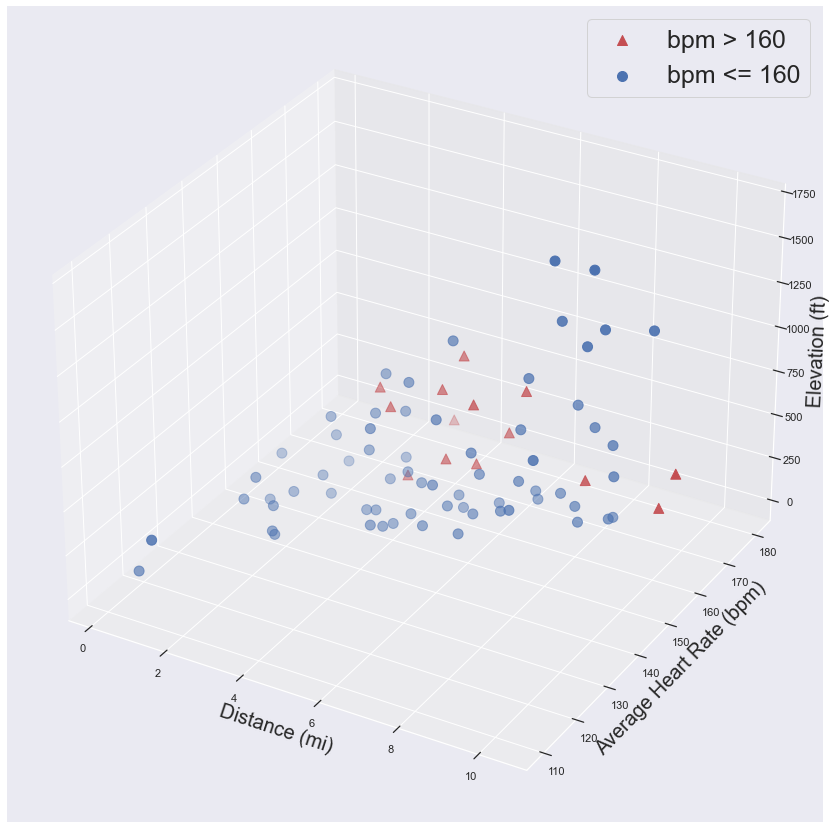

In [23]:
X_all = pd.concat([running_df.Distance, running_df['Avg HR'], ascent_col, labels], axis=1)
X_all = X_all.fillna(0)

High = np.where(X_all.iloc[:, 3] == 1)
Low = np.where(X_all.iloc[:, 3] == 0)
Y = X_all.to_numpy()

fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(projection='3d')
# ax.scatter(X_all.loc[0:, 'Distance'], X_all.loc[0:, 'Avg HR'], X_all.loc[0:, 'Total Ascent'], marker='o')
ax.scatter(Y[High, 0], Y[High, 1], Y[High, 2], s=100, c='r', marker='^', label='bpm > 160')
ax.scatter(Y[Low, 0], Y[Low, 1], Y[Low, 2], s=100, c='b', marker='o', label='bpm <= 160')
ax.legend(fontsize=25)
ax.set_xlabel('Distance (mi)', fontsize=20)
ax.set_ylabel('Average Heart Rate (bpm)', fontsize=20)
ax.set_zlabel('Elevation (ft)', fontsize=20)
